# **Data Preparation**
1.   Import các thư viện cần thiết
2.   Đọc dữ liệu
3.   Khám phá dữ liệu (EDA)

## Import thư viện

In [2]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Đọc dữ liệu

In [3]:
import os
from os import listdir
dirs = os.listdir('data') # Lấy danh sách các file trong folder
dirs

['audi.csv',
 'bmw.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'vauxhall.csv',
 'vw.csv']

In [4]:
#Kiểm tra các cột dữ liệu

basic = 'data/'
df = pd.DataFrame(data = None)
for file in dirs:
  url =  basic + file
  new_df = pd.read_csv(url)
  print(file, ":",new_df.columns)
  print("---")
  # df = pd.concat([df,new_df])

audi.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
bmw.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
focus.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
---
ford.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
hyundi.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')
---
merc.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
skoda.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object

toyota.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
vauxhall.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---
vw.csv : Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
---




> **Trong file của hãng xe hyundi cột thuế có tên là tax(£) thay vì tax nên Ta phải đổi tên cột trong file này**



In [5]:
#Integration data

basic = 'data/'
df = pd.DataFrame(data = None)
for file in dirs:
  url =  basic + file
  new_df = pd.read_csv(url) #đọc từng file trong folder
  new_df['automaker'] = file.split(".")[0] #tạo cột hãng xe
  if file == 'hyundi.csv': 
    new_df.rename(columns = {'tax(£)': 'tax'}, inplace =True) #đổi tên cột thuế
  df = pd.concat([df,new_df]) #gộp file
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automaker
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


## Exploratory data analysis (EDA)

**Preview data**

In [6]:
# Cột dữ liệu

df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'automaker'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104641 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         104641 non-null  object 
 1   year          104641 non-null  int64  
 2   price         104641 non-null  int64  
 3   transmission  104641 non-null  object 
 4   mileage       104641 non-null  int64  
 5   fuelType      104641 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    104641 non-null  float64
 9   automaker     104641 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.8+ MB


In [8]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automaker
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


 Phân loại categorical và numerical columns 

In [9]:
# Chuyển tất cả các cột có kiểu dữ liệu là object sang categorical

categorical_cols = ['model','transmission','fuelType','automaker']
for categorical_col in categorical_cols:
  df[categorical_col] = df[categorical_col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104641 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   model         104641 non-null  category
 1   year          104641 non-null  int64   
 2   price         104641 non-null  int64   
 3   transmission  104641 non-null  category
 4   mileage       104641 non-null  int64   
 5   fuelType      104641 non-null  category
 6   tax           99187 non-null   float64 
 7   mpg           99187 non-null   float64 
 8   engineSize    104641 non-null  float64 
 9   automaker     104641 non-null  category
dtypes: category(4), float64(3), int64(3)
memory usage: 6.1 MB


** Xem phân bổ của các biến **

Đối với biến Numerical

In [10]:
# Đối với biến Numerical

numerical_cols = ['year','price','mileage','tax','mpg','engineSize']

df[numerical_cols].describe()

,year,price,mileage,tax,mpg,engineSize
count,104641.000000,104641.000000,104641.00000,99187.000000,99187.000000,104641.000000
mean,2017.089066,16637.341186,23049.41090,120.299838,55.166825,1.647643
std,2.126373,9693.391294,21120.06364,63.150926,16.138522,0.554577
min,1970.000000,450.000000,1.00000,0.000000,0.300000,0.000000
25%,2016.000000,10000.000000,7530.00000,125.000000,47.100000,1.200000
50%,2017.000000,14440.000000,17360.00000,145.000000,54.300000,1.500000
75%,2019.000000,20395.000000,32234.00000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.00000,580.000000,470.800000,6.600000


In [11]:
# Đếm số giá trị riêng biệt trong biến định lượng
distincts = []
percents = []
for numerical_col in numerical_cols:
  distinct = df[numerical_col].nunique()
  percent = distinct*100/df.shape[0]
  print(numerical_col, 'column has',distinct,'distinct values')
  print('It takes', format(percent,'.2f'),'%')
  print('---')
  distincts.append(distinct)
  percents.append(format(percent,'.2f')+'%')
data = {'Count Distinct': distincts,'Take Percent':percents}

year column has 27 distinct values
It takes 0.03 %
---
price column has 13271 distinct values
It takes 12.68 %
---
mileage column has 42277 distinct values
It takes 40.40 %
---
tax column has 48 distinct values
It takes 0.05 %
---
mpg column has 208 distinct values
It takes 0.20 %
---
engineSize column has 40 distinct values
It takes 0.04 %
---


In [12]:
# Xem dưới dạng bảng thống kê

pd.DataFrame (data = data, index = numerical_cols)

,Count Distinct,Take Percent
year,27,0.03%
price,13271,12.68%
mileage,42277,40.40%
tax,48,0.05%
mpg,208,0.20%
engineSize,40,0.04%




> **Những biến định lượng có ít giá trị riêng biệt sẽ được nhóm cụm và chuyển thành biến category >> Chia theo tứ phân vị**



C:\Users\Admin\AppData\Local\Temp\ipykernel_34052\1066335418.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


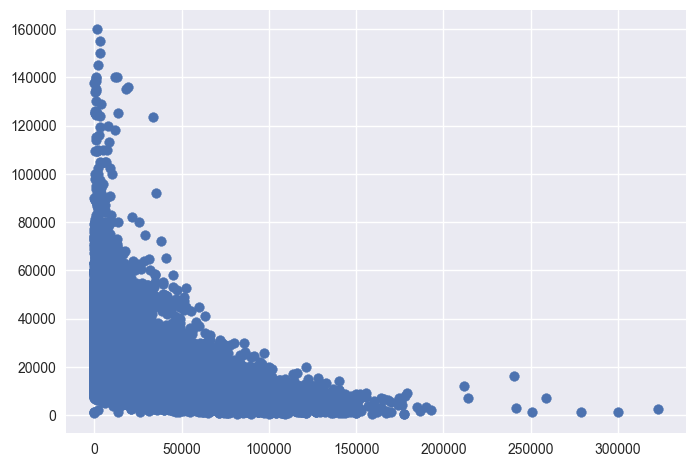

In [13]:
# Xem độ tương quan giữa giá xe và tổng số dặm đã đi (mileage)

plt.style.use('seaborn')

plt.scatter(data = df, x='mileage',y='price')



> Ta chưa thấy nhiều tương quan giữa 2 biến trên >> Thử logarit biến milleage



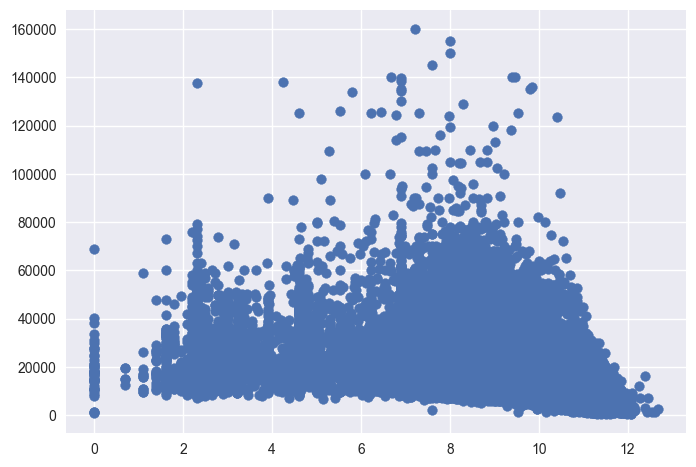

In [14]:
import math
df['ln_mileage'] = df['mileage'].apply(lambda x: math.log(x))

plt.scatter(data = df, x='ln_mileage',y='price')

In [15]:
# Độ tương quan 
df[['ln_mileage','price']].corr()

,ln_mileage,price
ln_mileage,1.000000,-0.421716
price,-0.421716,1.000000




> Tương quan nghịch >> Đúng với nhận định ban đấu



C:\Users\Admin\AppData\Local\Temp\ipykernel_34052\597852098.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


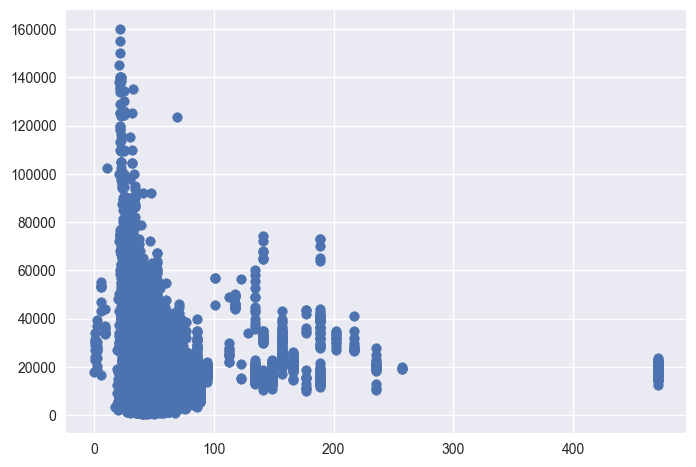

In [16]:
# Xem độ tương quan giữa giá xe và số dặm đi được trên 1 gallon(mpg)

plt.style.use('seaborn')

plt.scatter(data = df, x='mpg',y='price')

In [17]:
df[['mpg','price']].corr()

,mpg,price
mpg,1.000000,-0.296429
price,-0.296429,1.000000


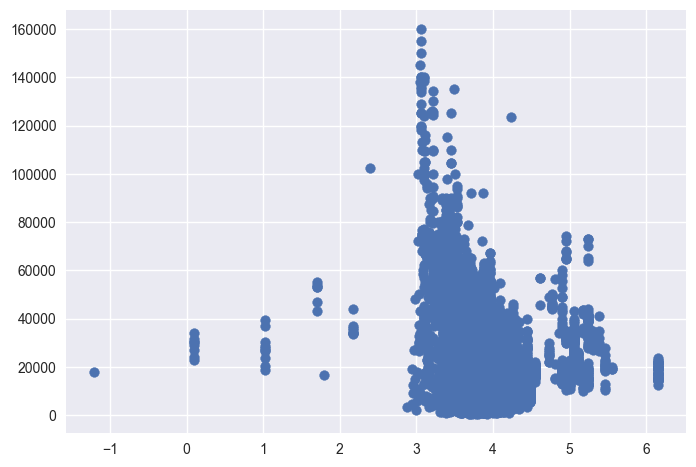

In [18]:
df['ln_mpg'] = df['mpg'].apply(lambda x: math.log(x))

plt.scatter(data = df, x='ln_mpg',y='price')

In [19]:
df[['ln_mpg','price']].corr()

,ln_mpg,price
ln_mpg,1.000000,-0.442113
price,-0.442113,1.000000


Đối với biến category

In [20]:
df.describe(include=['category'])

,model,transmission,fuelType,automaker
count,104641,104641,104641,104641
unique,195,4,5,10
top,Focus,Manual,Petrol,ford
freq,10042,61109,58473,17965




> Có quá nhiều Model tronng dữ liệu. Các mẫu xe được lấy theo từng tập dữ liệu của hãng. Ta sẽ xem phân bổ của giá theo hãng xe và sẽ chia nhóm cho từng hãng.


In [21]:
# Giá xe trung bình theo model
df.groupby('model')['price'].mean()

model
 1 Series    15821.670391
 2 Series    19539.371847
 3 Series    19880.857962
 4 Series    22498.418090
 5 Series    22537.428030
                 ...     
 i8          57012.588235
180          10799.000000
200          19495.000000
220          19995.000000
230           4500.000000
Name: price, Length: 195, dtype: float64

In [22]:
#Xem phân bổ
df.groupby('model')['price'].mean().describe()

count      195.000000
mean     20904.649592
std      15732.952087
min       1295.000000
25%      10356.120690
50%      17720.226351
75%      26826.640391
max      98934.200000
Name: price, dtype: float64



> **Biến định tính model sẽ được nhóm cụm trong bước sau**



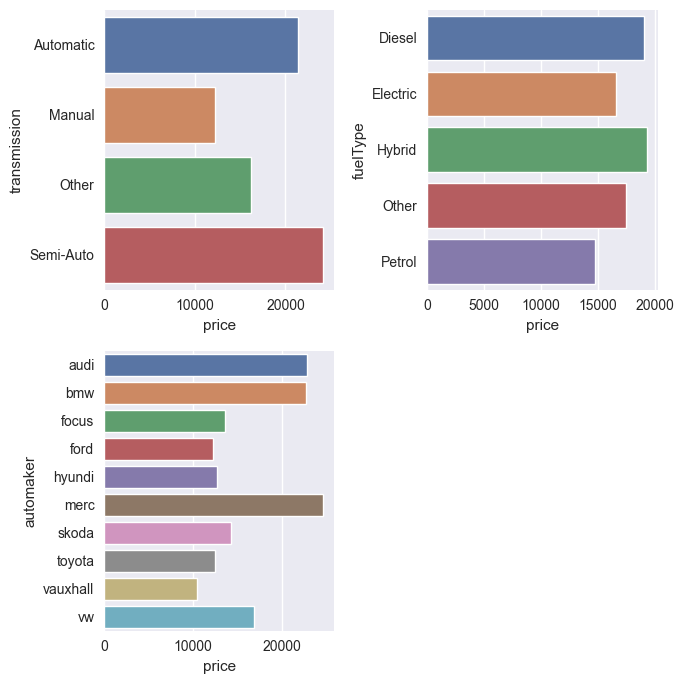

In [23]:
# Giá xa trung bình theo transmission, fuelType, automaker

cols = ['transmission', 'fuelType', 'automaker']
# data = df.groupby[cols[i]]
n_cols = 2
n_rows = 2
fix, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
for r in range(n_rows):
    for c in range(n_cols):
        i = r*n_cols + c #Lấy vị trí của cols muốn vẽ
        if i < len(cols):
            ax_i = ax[r,c] #Lấy axis muốn vẽ
            data = df.groupby(cols[i])['price'].mean().sort_values(ascending = False).reset_index()

            sns.barplot(data = data ,y=cols[i],x = 'price',ax= ax_i)
            ax.flat[-1].set_visible(False) #Xóa axis cuối
            plt.tight_layout() #Để các đồ thị không đè lên nhau




> Ta thấy hãy xe nhiều hãng có giá trung bình tương tự nhau. Kết hợp với việc các Model thuộc các hãng riêng biệt nên ta sẽ gom cột Model và cột Automaker thành một cột mới và chia theo "Hạng xe"



# **Tiền xử lý dữ liệu - Data Preprocessing**

## **Xử lý dữ liệu thiếu - Missing value**

In [24]:
columns = df.columns
for i,column in enumerate(columns):
  missing = df[column].isnull().sum()
  percent = missing*100/(df.shape[0])
  if missing  > 0:
    print('Column', column, 'contains', missing, 'missing value')
    print('take', format(percent, ".2f"), "%")
    print("--")

Column tax contains 5454 missing value
take 5.21 %
--
Column mpg contains 5454 missing value
take 5.21 %
--
Column ln_mpg contains 5454 missing value
take 5.21 %
--


Thay những giá trị tax và ln_mpg bị null bằng giá trị trung bình của toàn dữ liệu

In [25]:
avg = df[df['ln_mpg'].notnull()]['ln_mpg'].mean()
df['ln_mpg'] = df['ln_mpg'].fillna(avg)
df['ln_mpg']

0        4.014580
1        4.162003
2        4.014580
3        4.209160
4        3.903991
           ...   
15152    4.075841
15153    3.835142
15154    3.737670
15155    3.835142
15156    3.835142
Name: ln_mpg, Length: 104641, dtype: float64

In [26]:

df['tax'] = df['tax'].fillna(df[df['tax'].notnull()]['tax'].mean())
df['tax']

0        150.0
1         20.0
2         30.0
3        145.0
4        145.0
         ...  
15152    125.0
15153    145.0
15154    200.0
15155    150.0
15156    145.0
Name: tax, Length: 104641, dtype: float64

## **Data Transformation**

** Data Wrangging **

In [27]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automaker,ln_mileage,ln_mpg
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,9.663643,4.014580
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,10.496897,4.162003
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,10.307151,4.014580
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,10.164004,4.209160
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,7.599902,3.903991


In [28]:
def fill_class(x):
  if x in ('merc','audi','bmw'):
    return "Luxury"
  if x in ('vw','skoda','focus'):
    return "Mid-range"
  else:
    return "Affordable"

df['Class'] = df['automaker'].apply(lambda x: fill_class(x))
df['Class'].value_counts()

Affordable    43195
Luxury        34568
Mid-range     26878
Name: Class, dtype: int64

In [29]:
df['year'].describe()

count    104641.000000
mean       2017.089066
std           2.126373
min        1970.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2060.000000
Name: year, dtype: float64

In [30]:

df['year'] = pd.cut(df['year'],
                    bins = [0, 2015.9, 2016.9, 2018.9, 2061],
                    labels =['hơn 5 năm','4-5 năm','2-4 năm','dưới 2 năm'])
df['year'].value_counts()

2-4 năm       37751
dưới 2 năm    32897
hơn 5 năm     17590
4-5 năm       16403
Name: year, dtype: int64

In [31]:
df['engineSize'].describe()

count    104641.000000
mean          1.647643
std           0.554577
min           0.000000
25%           1.200000
50%           1.500000
75%           2.000000
max           6.600000
Name: engineSize, dtype: float64

In [32]:
df['engineSize'] = pd.cut(df['engineSize'],
                    bins = [-1, df['engineSize'].quantile(0.25)-0.01, df['engineSize'].quantile(0.5)-0.01, df['engineSize'].quantile(0.75)-0.01, df['engineSize'].max()+0.01],
                    labels =['Small','Medium','Large','Very Large'])

In [33]:
df['engineSize'].value_counts()

Very Large    39742
Large         24753
Small         20783
Medium        19363
Name: engineSize, dtype: int64

In [34]:
# xỬ LÝ Outlier
cols = ['ln_mileage','tax','ln_mpg','price']
for col in cols:
    # Tính IQR của biến
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Xác định ngưỡng trên và ngưỡng dưới
    upper_threshold = Q3 + (1.5 * IQR)
    lower_threshold = Q1 - (1.5 * IQR)

    # Thay thế các giá trị outlier
    df[col] = df[col].apply(lambda x: upper_threshold if x >= upper_threshold else (lower_threshold if x <= lower_threshold else x))
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,automaker,ln_mileage,ln_mpg,Class
0,A1,2-4 năm,12500.0,Manual,15735,Petrol,150.000000,55.4,Medium,audi,9.663643,4.014580,Luxury
1,A6,4-5 năm,16500.0,Automatic,36203,Diesel,83.249594,64.2,Very Large,audi,10.496897,4.162003,Luxury
2,A1,4-5 năm,11000.0,Manual,29946,Petrol,83.249594,55.4,Medium,audi,10.307151,4.014580,Luxury
3,A4,2-4 năm,16800.0,Automatic,25952,Diesel,145.000000,67.3,Very Large,audi,10.164004,4.209160,Luxury
4,A3,dưới 2 năm,17300.0,Manual,1998,Petrol,145.000000,49.6,Small,audi,7.599902,3.903991,Luxury


** Chia tập dữ liệu X,y**

In [35]:
cat_features = ['year','transmission','fuelType','engineSize','Class']
num_features = ['ln_mileage','tax','ln_mpg']
features = cat_features + num_features

X = df[features].reset_index(drop=True)
y = df['price'].reset_index(drop=True)
X

,year,transmission,fuelType,engineSize,Class,ln_mileage,tax,ln_mpg
0,2-4 năm,Manual,Petrol,Medium,Luxury,9.663643,150.000000,4.014580
1,4-5 năm,Automatic,Diesel,Very Large,Luxury,10.496897,83.249594,4.162003
2,4-5 năm,Manual,Petrol,Medium,Luxury,10.307151,83.249594,4.014580
3,2-4 năm,Automatic,Diesel,Very Large,Luxury,10.164004,145.000000,4.209160
4,dưới 2 năm,Manual,Petrol,Small,Luxury,7.599902,145.000000,3.903991
...,...,...,...,...,...,...,...,...
104636,hơn 5 năm,Manual,Diesel,Very Large,Mid-range,11.211820,125.000000,4.075841
104637,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.386251,145.000000,3.835142
104638,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.156251,182.050243,3.737670
104639,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.323023,150.000000,3.835142


** Chuẩn hóa và xử lý dữ liệu**

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Đường ống 
num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('encoder',OneHotEncoder())
])

#Khai báo quá trình xử lý
preprocessor = ColumnTransformer([
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features),
])

#Fit và transform vào bộ dữ liệu
X_transformed = preprocessor.fit_transform(X)
X_transformed

array([[ 0.09535196,  0.64768982,  0.16638162, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82469653, -1.70268063,  0.86618347, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.65861235, -1.70268063,  0.16638162, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.40182602,  1.77622147, -1.14807612, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.54780157,  0.64768982, -0.68538685, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.4504661 ,  0.47163318, -0.68538685, ...,  0.        ,
         0.        ,  1.        ]])

**Chia tranning set và test set**

In [37]:
#Chia bộ dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size = 0.8)
len(X_train), len(X_test)

(83712, 20929)

# **Chạy mô hình**

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Khai báo mô hình
linear_regression = linear_model.LinearRegression()

#Huấn luyện mô hình
linear_regression.fit(X_train, y_train)




LinearRegression()

In [39]:
y_pred = linear_regression.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R2 Score:',r2)

R2 Score: 0.8233001346790821


In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE:',mse)
print('RMSE:',rmse)

MSE: 11059901.904319365
RMSE: 3325.643081318163


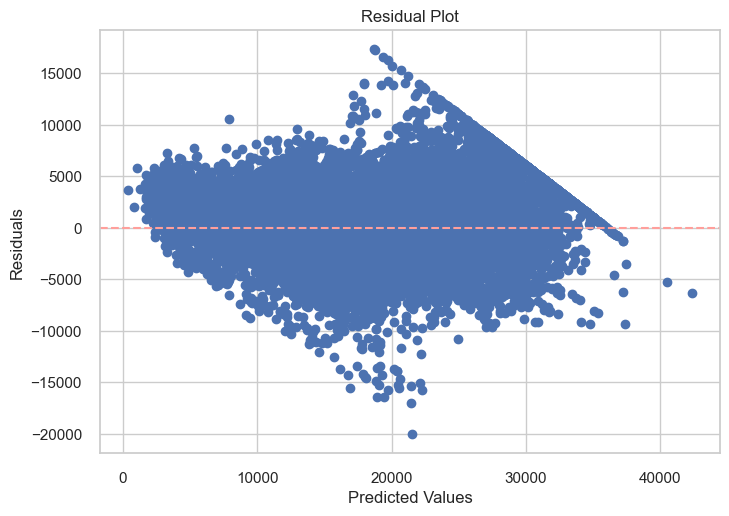

In [113]:
y_pred = linear_regression.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# **Dự báo**

In [41]:
# Hiển thị các tham số ước lượng

print("Intercept:", linear_regression.intercept_)
print("Coefficients:", linear_regression.coef_)

Intercept: 1.5747576166160984e+16
Coefficients: [-1.77332162e+03 -4.96985530e+02 -2.51837626e+03  1.03912893e+16
  1.03912893e+16  1.03912893e+16  1.03912893e+16 -4.19545309e+15
 -4.19545309e+15 -4.19545309e+15 -4.19545309e+15  2.71494193e+14
  2.71494193e+14  2.71494193e+14  2.71494193e+14  2.71494193e+14
 -8.72137480e+14 -8.72137480e+14 -8.72137480e+14 -8.72137480e+14
 -2.13427690e+16 -2.13427690e+16 -2.13427690e+16]


In [42]:
intercept = linear_regression.intercept_
coef = linear_regression.coef_

In [45]:
y_pred = linear_regression.predict(X_test)
y_pred


array([12046.,  9656., 10096., ..., 13976., 12304., 12488.])

In [46]:
y_test

59837     12999.0
102180     8890.0
48675      7495.0
71136      8000.0
23442      7800.0
           ...   
25663      7700.0
101944     8701.0
85904     11299.0
90154     17780.0
49962      9995.0
Name: price, Length: 20929, dtype: float64

** Viết 1 đoạn script chuyển đổi từ dữ liệu nhập từ bên ngoài sang dữ liệu được dùng trong mô hình**

In [ ]:
#Import thư viện
import pandas as pd
import numpy as np
from datetime import date
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#Hàm đổi dữ liệu năm
def fill_year(year):
  year_today = date.today().year
  if year <= year_today-2:
    return 'dưới 2 năm'
  elif year <= year_today - 4:
    return '2-4 năm'
  elif year <= year_today - 5:
    return '4-5 năm'
  else:
    return 'hơn 5 năm'

#Hàm đổi dữ liệu dung tích động cơ
def fill_engineSize(x):
  if x < 1.2:
    return 'Small'
  elif x < 1.5:
    return 'Medium'
  elif x < 2:
    return 'Large'
  else:
    return 'Very Large'

#Hàm đổi dữ liệu hãng xe
def fill_class(x):
  if x in ('merc','audi','bmw'):
    return "Luxury"
  if x in ('vw','skoda','focus'):
    return "Mid-range"
  else:
    return "Affordable"

#Hàm chuyển dữ liệu từ từ form nhập thành dữ liệu được chuẩn hóa
def from_df_to_X(year, transmission, mileage, fuelType, tax, mpg, engineSize):
  Class = fill_class(automaker)
  year = fill_year(year)
  ln_mpg = math.log(float(mpg))
  ln_mileage = math.log(float(mileage))
  engineSize = fill_engineSize(engineSize)
  data = {'year': [year],
          'transmission': [transmission],
          'fuelType': [fuelType],
          'engineSize': [engineSize],
          'Class': [Class],
          'ln_mileage': [ln_mileage],
          'tax': [tax],
          'ln_mpg': [ln_mpg]
          }
  X = pd.DataFrame(data=data)
  return X

#Hàm chuyển tự dữ liệu chuẩn hóa thành dữ liệu dùng trong mô hình
def from_X_to_X_transformed(X_new):
  cat_features = ['year','transmission','fuelType','engineSize','Class']
  num_features = ['ln_mileage','tax','ln_mpg']
  for cat_feature in cat_features:
    X_new[cat_feature] = X_new[cat_feature].astype('category')
  features = cat_features + num_features

  #Fit và transform vào bộ dữ liệu
  X_new_transformed = preprocessor.transform(X_new)
  return X_new_transformed

#Lấy dữ liệu từ form nhập
year = int(input('Year: '))
transmission = input('Chosse one(Manual, Semi-Auto, ...): ')
mileage = input('Mileage: ')
fuelType = input('Chosse one(Petrol, Diesel, ...): ')
tax = int(input('Tax: '))
mpg = input('Mpg: ')
engineSize = float(input('engineSize: '))
automaker = input('Automaker: ')
X_new = from_df_to_X(year, transmission, mileage, fuelType, tax, mpg, engineSize)
X_new_transformed = from_X_to_X_transformed(X_new)
print(X_new_transformed)

# Mô hình OLS

In [59]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

In [50]:
#Mã hóa các cột category
# Thực hiện encode cho các cột categorical
X['price'] = y
cat_cols = ['year', 'transmission','fuelType','engineSize','Class']
for cat_col in cat_cols:
    min_value = X.groupby(cat_col)['price'].sum().sort_values().index[0]
    values = X[cat_col].unique()
    for value in values:
        X[value] = X[cat_col].apply(lambda x: 0 if x == min_value else (1 if x == value else 0))
del X['price']
X  

,year,transmission,fuelType,engineSize,Class,ln_mileage,tax,ln_mpg,2-4 năm,4-5 năm,...,Diesel,Hybrid,Electric,Medium,Very Large,Small,Large,Luxury,Mid-range,Affordable
0,2-4 năm,Manual,Petrol,Medium,Luxury,9.663643,150.000000,4.014580,1,0,...,0,0,0,0,0,0,0,1,0,0
1,4-5 năm,Automatic,Diesel,Very Large,Luxury,10.496897,83.249594,4.162003,0,1,...,1,0,0,0,1,0,0,1,0,0
2,4-5 năm,Manual,Petrol,Medium,Luxury,10.307151,83.249594,4.014580,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2-4 năm,Automatic,Diesel,Very Large,Luxury,10.164004,145.000000,4.209160,1,0,...,1,0,0,0,1,0,0,1,0,0
4,dưới 2 năm,Manual,Petrol,Small,Luxury,7.599902,145.000000,3.903991,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104636,hơn 5 năm,Manual,Diesel,Very Large,Mid-range,11.211820,125.000000,4.075841,0,0,...,1,0,0,0,1,0,0,0,0,0
104637,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.386251,145.000000,3.835142,0,0,...,0,0,0,0,0,0,0,0,0,0
104638,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.156251,182.050243,3.737670,0,0,...,0,0,0,0,0,0,0,0,0,0
104639,hơn 5 năm,Manual,Petrol,Medium,Mid-range,11.323023,150.000000,3.835142,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
remove_cols = cat_cols
X = X.drop(columns = remove_cols,axis =1)
X

,ln_mileage,tax,ln_mpg,2-4 năm,4-5 năm,dưới 2 năm,hơn 5 năm,Manual,Automatic,Semi-Auto,...,Diesel,Hybrid,Electric,Medium,Very Large,Small,Large,Luxury,Mid-range,Affordable
0,9.663643,150.000000,4.014580,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,10.496897,83.249594,4.162003,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,10.307151,83.249594,4.014580,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,10.164004,145.000000,4.209160,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,7.599902,145.000000,3.903991,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104636,11.211820,125.000000,4.075841,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
104637,11.386251,145.000000,3.835142,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104638,11.156251,182.050243,3.737670,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104639,11.323023,150.000000,3.835142,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# Thực hiện scaler cho các cột numerical
from sklearn.preprocessing import StandardScaler
num_cols = ['ln_mileage','tax','ln_mpg']
scaler = StandardScaler()
X[num_cols] = pd.DataFrame(data = scaler.fit_transform(X[num_cols]), columns= num_cols)
X


,ln_mileage,tax,ln_mpg,2-4 năm,4-5 năm,dưới 2 năm,hơn 5 năm,Manual,Automatic,Semi-Auto,...,Diesel,Hybrid,Electric,Medium,Very Large,Small,Large,Luxury,Mid-range,Affordable
0,0.095352,0.647690,0.166382,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.824697,-1.702681,0.866183,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,0.658612,-1.702681,0.166382,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.533316,0.471633,1.090032,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4,-1.711033,0.471633,-0.358570,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104636,1.450466,-0.232593,0.457182,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
104637,1.603144,0.471633,-0.685387,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104638,1.401826,1.776221,-1.148076,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
104639,1.547802,0.647690,-0.685387,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='ln_mileage', ylabel='Count'>

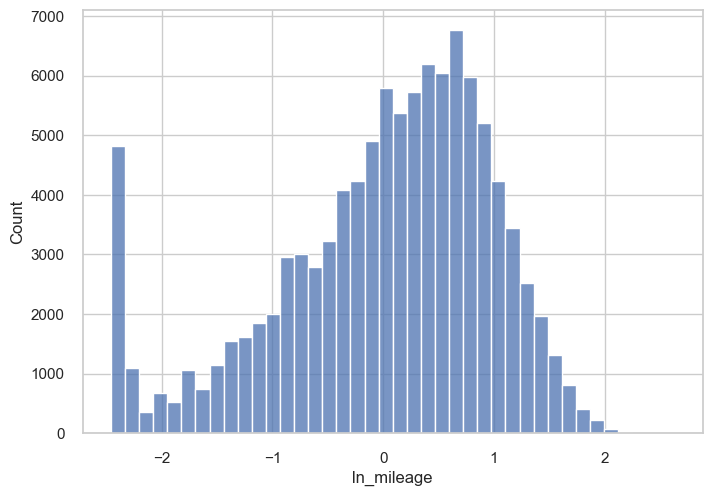

In [56]:
sns.histplot(data = X, x ='ln_mileage', bins = 40)

In [57]:
#Chia bộ dữ liệu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8)
len(X_train), len(X_test)

(83712, 20929)

In [60]:
#Huấn luyện mô hình
model = sm.OLS(y_train, X_train)

results = model.fit()

In [61]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          1.327e+05
Date:                Sat, 10 Jun 2023   Prob (F-statistic):                        0.00
Time:                        20:31:26   Log-Likelihood:                     -7.9740e+05
No. Observations:               83712   AIC:                                  1.595e+06
Df Residuals:                   83694   BIC:                                  1.595e+06
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
ln_mileage -1773.4115     18.338    -96.709      0.000   -1809.353   -1737.470
tax         -509.0078     15.395    -33.064      0.000    -539.181    -478.834
ln_mpg     -2525.2214     19.280   -130.978      0.000   -2563.010   -2487.433
2-4 năm     5336.0008     38.183    139.746      0.000    5261.161    5410.840
4-5 năm     3051.6809     41.304     73.884      0.000    2970.726    3132.636
dưới 2 năm  6987.4185     52.373    133.417      0.000    6884.768    7090.069
hơn 5 năm   1.669e-13   1.32e-11      0.013      0.990   -2.56e-11     2.6e-11
Manual      4963.6798   1000.774      4.960      0.000    3002.170    6925.189
Automatic   6759.0619   1000.526      6.756      0.000    4798.039    8720.085
Semi-Auto   7698.6430   1000.898      7.692      0.000    5736.890    9660.396
Other       5043.6698   1023.232      4.929      0.000    3038.143    7049.196
Petrol      1641.2474   1001.173      1.639      0.101    -321.045    3603.540
Diesel      3818.3380   1001.355      3.813      0.000    1855.690    5780.986
Hybrid      9587.9516   1003.451      9.555      0.000    7621.196    1.16e+04
Electric    -3.54e-12   1.26e-11     -0.282      0.778   -2.82e-11    2.11e-11
Medium     -1.073e-12   3.44e-12     -0.312      0.755   -7.81e-12    5.67e-12
Very Large  4734.6816     49.403     95.837      0.000    4637.851    4831.512
Small        847.0438     39.767     21.300      0.000     769.101     924.987
Large       1506.7365     41.376     36.415      0.000    1425.639    1587.834
Luxury      3498.4517     34.198    102.299      0.000    3431.423    3565.480
Mid-range           0          0        nan        nan           0           0
Affordable -1465.6783     30.439    -48.152      0.000   -1525.338   -1406.019
==============================================================================
Omnibus:                     2810.948   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7314.265
Skew:                           0.127   Prob(JB):                         0.00
Kurtosis:                       4.426   Cond. No.                     3.24e+35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.59e-66. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

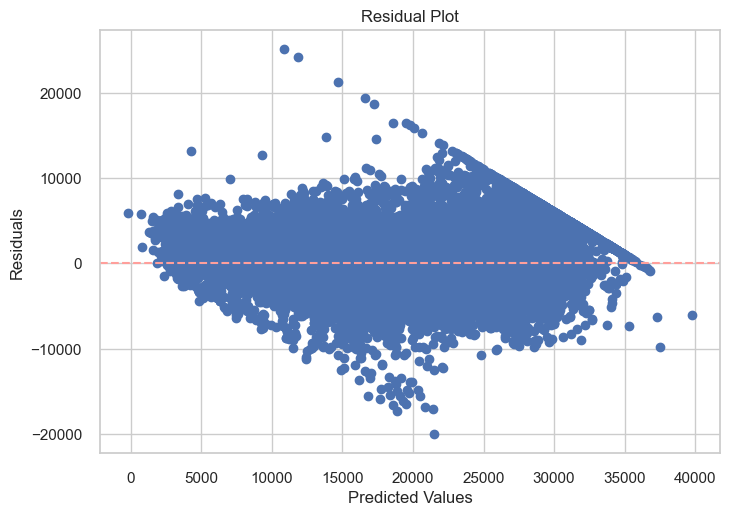

In [62]:
y_pred = results.predict(X_test)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [63]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 10982795.131029736
RMSE: 3314.0300437729493
